In [13]:
import torch, matplotlib.pyplot as plt
import numpy as np, cv2, os
from torchvision import transforms, models
from PIL import Image

iaps_path = "/home/kavra/Datasets/IAPS/"
stim_path = "/home/kavra/Datasets/fMRI_affect_img/stimuli_v/"

### Stimulus RDM based on Generic Pre-Trained Embeddings

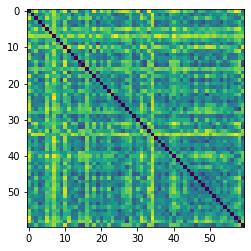

In [68]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

model = models.densenet121(pretrained=True)
model.eval()

embeds = []
for i in os.listdir(stim_path):
    img = Image.open(stim_path+i)
    img = transform(img)
    out = model(img.unsqueeze(0))
    embeds.append(out.squeeze())

embeds = torch.stack(embeds, dim=0)
# pearson corr coefficients
rdm = 1 - torch.corrcoef(embeds)
plt.imshow(rdm.detach().numpy());

### Stimulus Matching to IAPS Images

In [3]:
for i in os.listdir(stim_path):

    im = plt.imread(stim_path+i)
    img = cv2.resize(im, dsize=(224, 224))
    img = img.mean(-1).flatten()
    img_hist, _ = np.histogram(img, bins=100, density=True)
    
    for iaps_i in os.listdir(iaps_path):

        iaps_im = plt.imread(iaps_path+iaps_i)
        iaps_img = cv2.resize(iaps_im, dsize=(224, 224))
        iaps_img = iaps_img.mean(-1).flatten()
        iaps_img_hist, _ = np.histogram(iaps_img, bins=100, density=True)

        loss1 = ((img_hist - iaps_img_hist)**2).mean()
        loss2 = ((img - iaps_img)**2).mean()

        if (loss1 < 1e-6) or (loss2 < 5e-6):
            #plt.imshow(im); plt.show()
            #plt.imshow(iaps_im); plt.show()
            print(f"Stimulus {i} is {iaps_i} in IAPS")
            

Stimulus 25.jpg is 7380.jpg in IAPS
Stimulus 48.jpg is 9220.jpg in IAPS
Stimulus 43.jpg is 2456.jpg in IAPS
Stimulus 14.jpg is 1050.jpg in IAPS
Stimulus 34.jpg is 9043.jpg in IAPS
Stimulus 35.jpg is 9322.jpg in IAPS
Stimulus 31.jpg is 5530.jpg in IAPS
Stimulus 31.jpg is 1280.jpg in IAPS
Stimulus 47.jpg is 9002.jpg in IAPS
Stimulus 39.jpg is 8231.jpg in IAPS
Stimulus 42.jpg is 2312.jpg in IAPS
Stimulus 40.jpg is 2278.jpg in IAPS
Stimulus 33.jpg is 7650.jpg in IAPS
Stimulus 33.jpg is 3019.jpg in IAPS
Stimulus 33.jpg is 9031.jpg in IAPS
Stimulus 45.jpg is 2703.jpg in IAPS
Stimulus 41.jpg is 2301.jpg in IAPS
Stimulus 36.jpg is 9390.jpg in IAPS
